## Importing packages

First, we will import the packages that will be used for this analysis. These include:
- *Numpy* - allows fast mathematical operations over arrays
- *Pandas* - easily work with data frames
- *Matplotlib* - for data visualisation
- *Scipy* - a scientific computing package
- *Sklearn* - a machine learning module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Import Data Set

We will import the data set as a *CSV*  This data set can be found on [Kaggle](www.Kaggle.com), but I have also uploaded it to this GitHub repository for convenience.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/th3RFC/portfolio/main/python/Capstone%20Projects/data/Loan%20Acceptance.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

### Data Set Dimension

Let us start by finding out the dimensions of our data set. This should tell us how many observations we have (in this case, loan applications) and how many variables (attributes about the loan applicant) that our data set includes.

In [3]:
# Use shape method to extract number of observations and number of variables
loans = df.shape[0]
vars = df.shape[1]

print("There are {} and {} variables in this dataset!".format(loans, vars))

There are 614 and 13 variables in this dataset!


### Variable Distributions

#### Gender

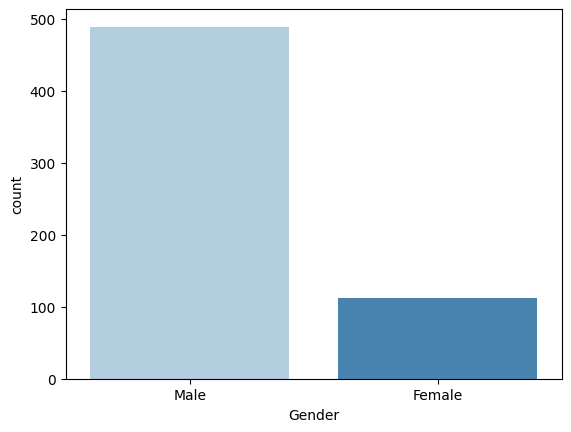

In [5]:
sns.countplot(x="Gender", data=df, palette="Blues")
plt.show()

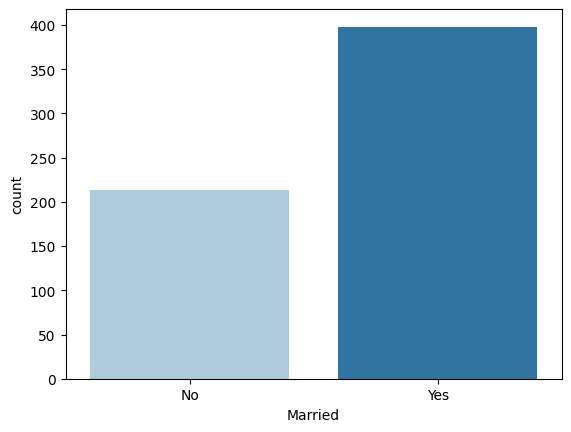

In [8]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

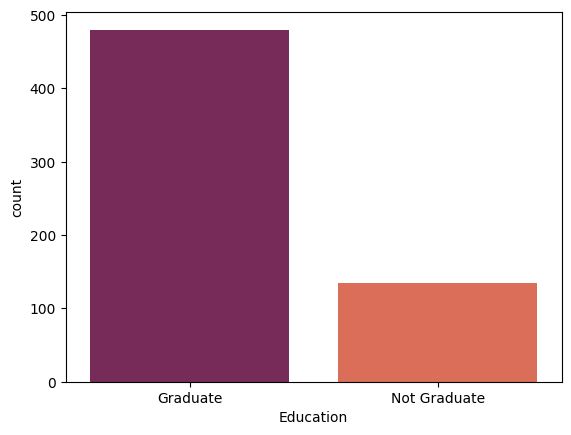

In [11]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

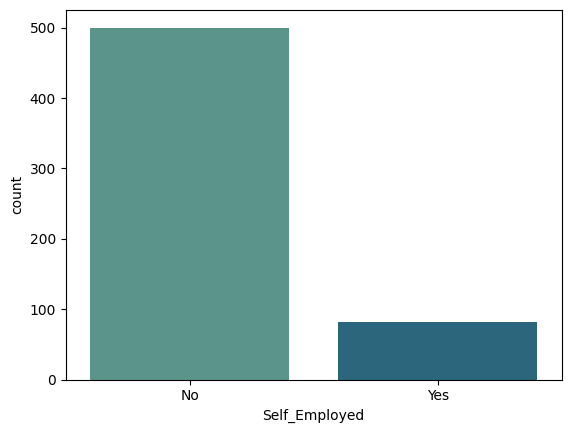

In [14]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

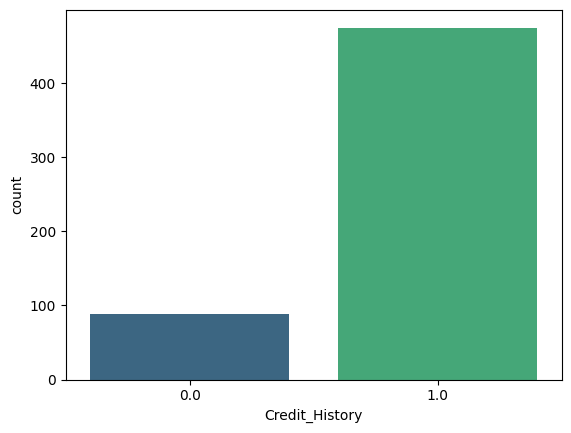

In [17]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

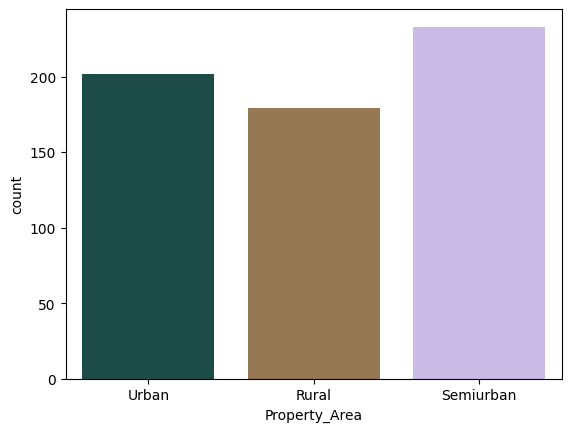

In [20]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

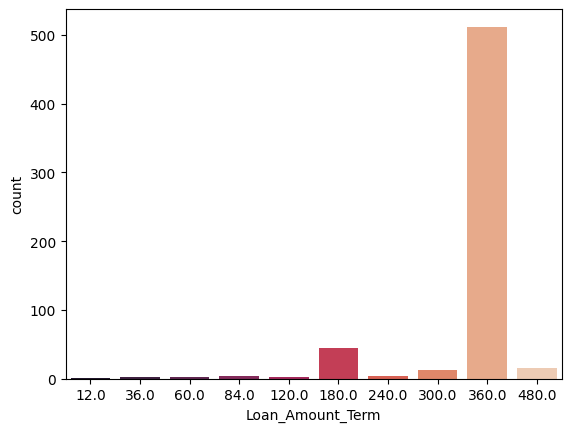

In [25]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [27]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


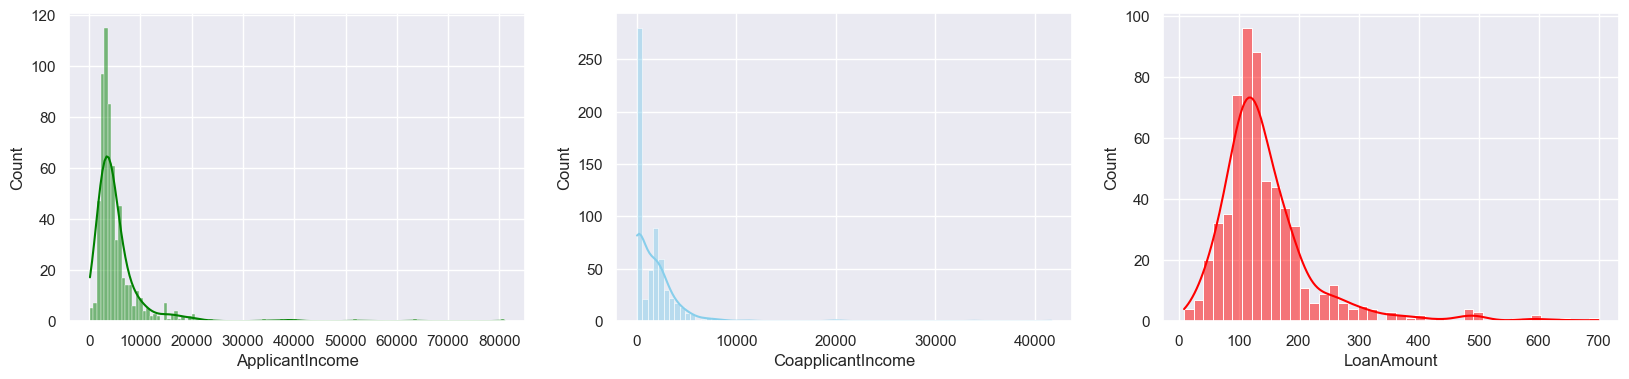

In [28]:
sns.set(style="darkgrid")
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=ax1, color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=ax2, color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=ax3, color='red');

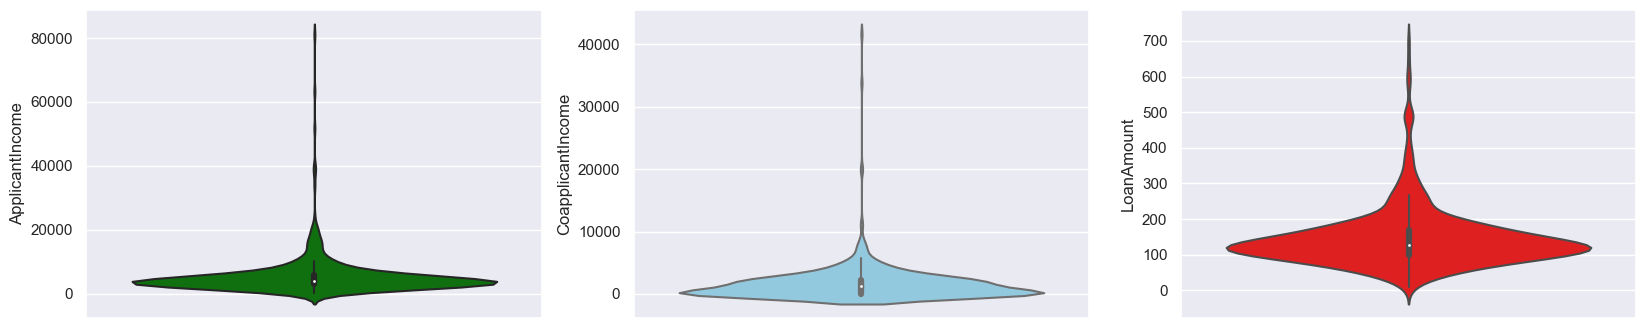

In [29]:
sns.set(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.violinplot(data=df, y="ApplicantIncome", ax=ax1, color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=ax2, color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=ax3, color='red');

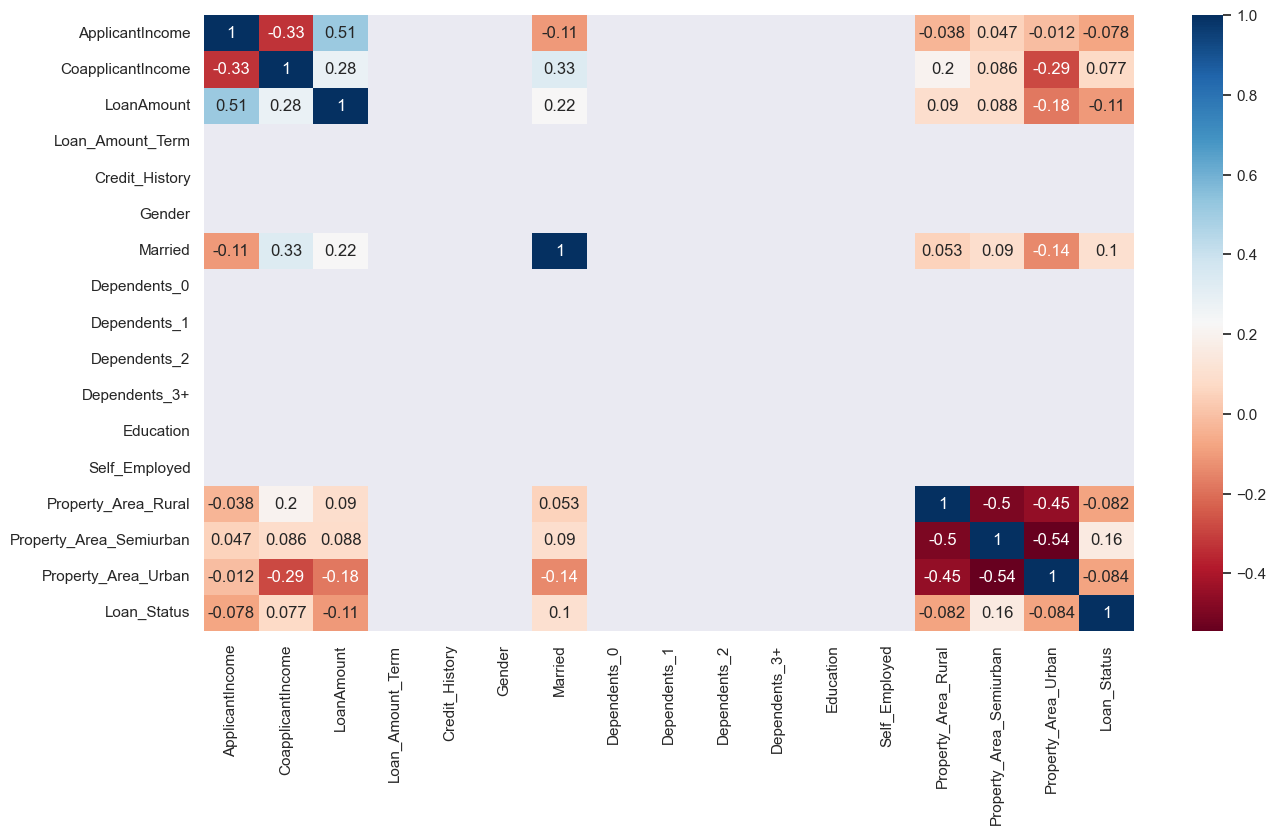

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

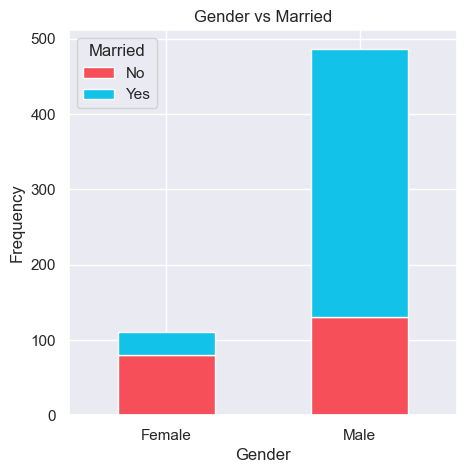

In [31]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

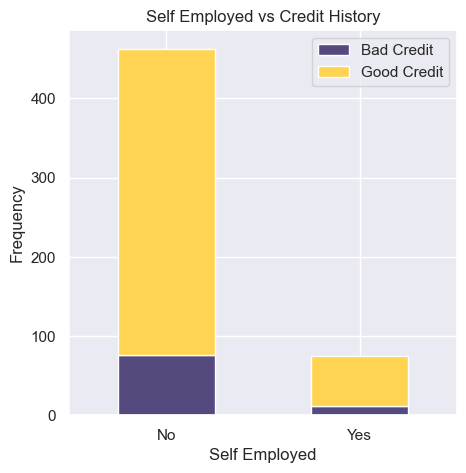

In [32]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

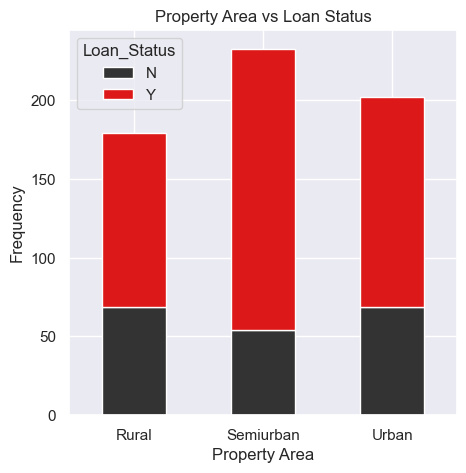

In [33]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

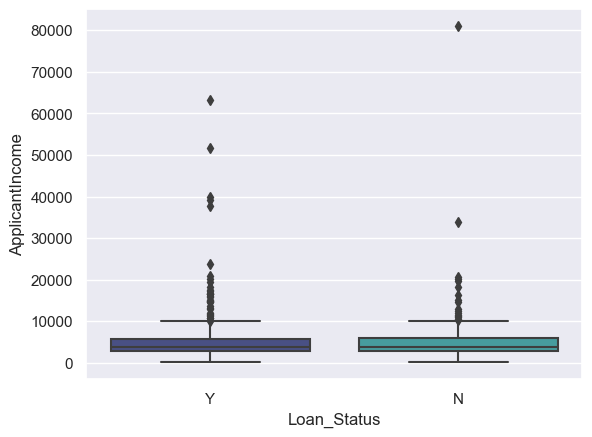

In [34]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

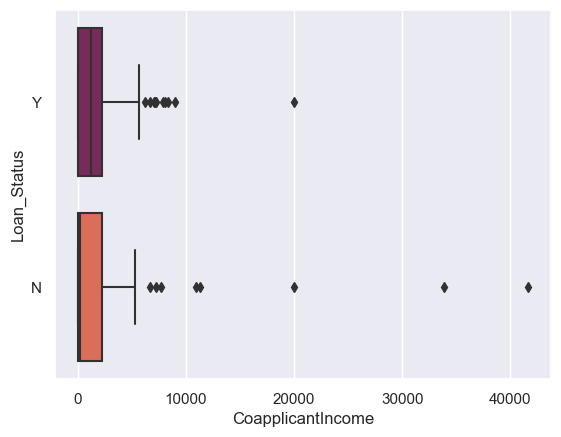

In [35]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

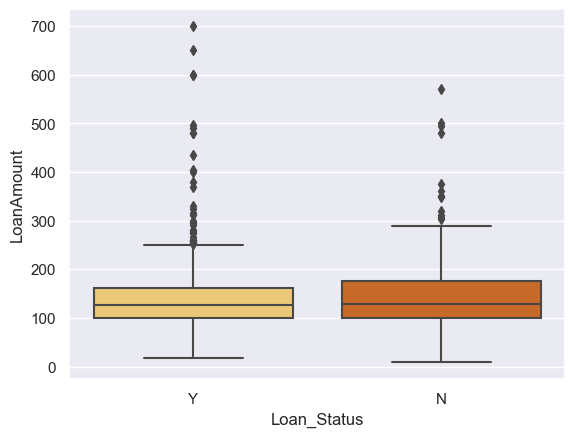

In [36]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

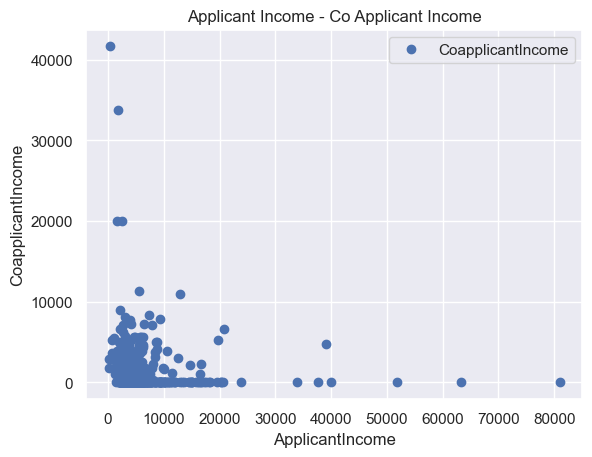

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [37]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [38]:
df.isnull().sum().to_frame()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


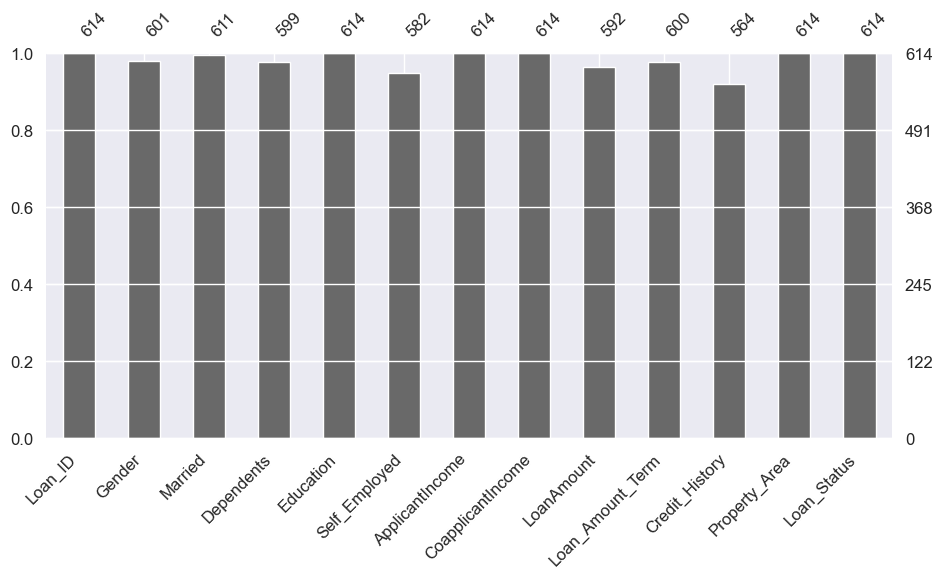

In [39]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

In [40]:
df = df.drop(['Loan_ID'], axis = 1)

In [41]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [42]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [43]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

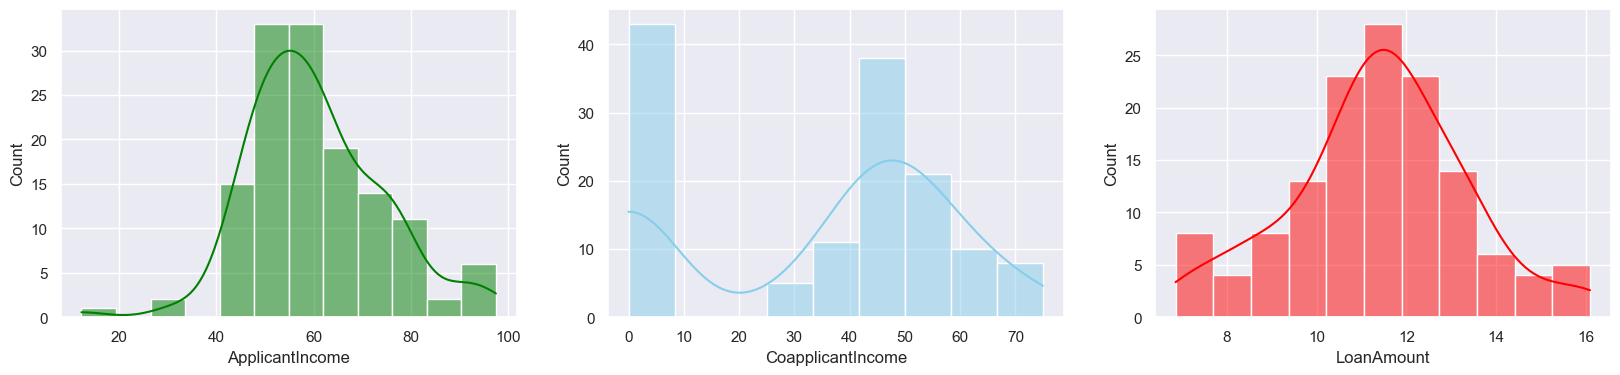

In [46]:
sns.set(style="darkgrid")
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=ax1, color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=ax2, color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=ax3, color='red');

In [47]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [48]:
X, y = SMOTE().fit_resample(X, y)

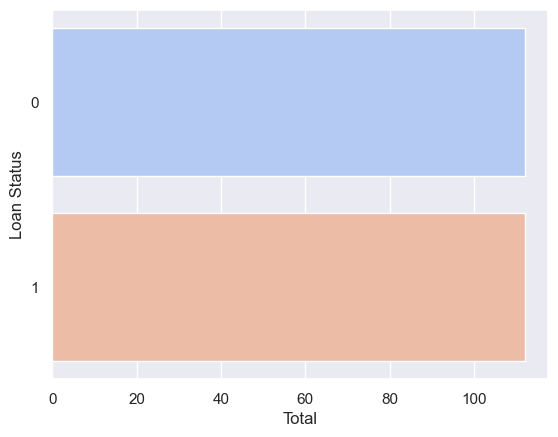

In [49]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [50]:
X = MinMaxScaler().fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

[[20  3]
 [ 4 18]]
LR accuracy: 84.44%


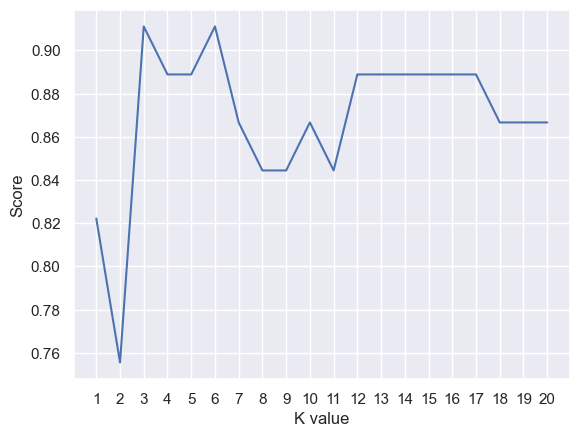

KNN best accuracy: 91.11%


In [53]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [54]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.84      0.95      0.89        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[19  4]
 [ 1 21]]
SVC accuracy: 88.89%


In [55]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

[[20  3]
 [ 4 18]]
Categorical Naive Bayes accuracy: 84.44%


In [56]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.75      0.55      0.63        22

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45

[[19  4]
 [10 12]]
Gaussian Naive Bayes accuracy: 68.89%


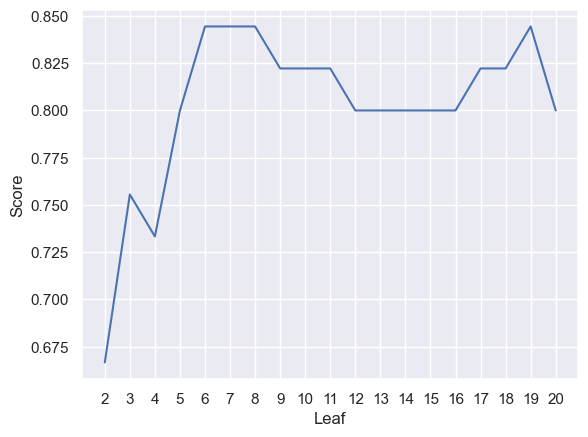

Decision Tree Accuracy: 84.44%


In [57]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

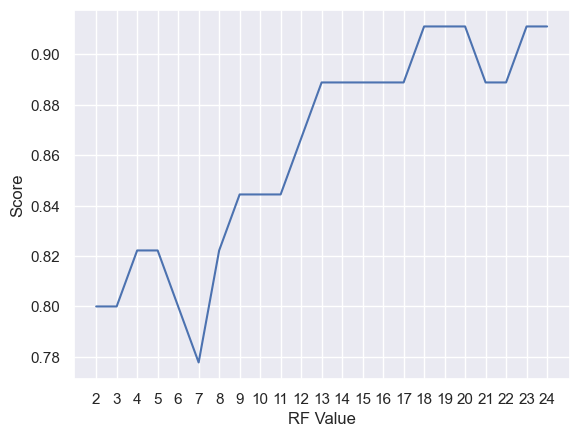

Random Forest Accuracy:  91.11%


In [58]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [59]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [60]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [61]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=2, max_leaf_nodes=40, n_estimators=300,
                           subsample=1)
0.788888888888889
{'subsample': 1, 'n_estimators': 300, 'max_leaf_nodes': 40, 'max_depth': 2}
3


In [62]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

[[20  3]
 [ 4 18]]
Gradient Boosting accuracy: 84.44%


In [63]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,91.111111
6,Random Forest,91.111111
2,SVM,88.888889
0,Logistic Regression,84.444444
3,Categorical NB,84.444444
5,Decision Tree,84.444444
7,Gradient Boost,84.444444
4,Gaussian NB,68.888889
